In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import time

Using TensorFlow backend.


In [2]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [3]:
from emnist import list_datasets
from emnist import extract_training_samples,extract_test_samples
letters, _ = extract_test_samples('letters')

In [10]:

def get_img_distance(image):
    return { 'image':image,'distance': np.corrcoef(query_desc,image.flatten())[0][1]} ##change descriptor here    

def Show_Results(result,size):
    result = list(result)
    plt.figure(figsize=(15,15))
    for i in range(size):
        image_and_desc = result[i]
        plt.subplot(5,10,i+1)
        plt.xticks([image_and_desc['distance']])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
    plt.show()

In [5]:
print(trainX.shape)

(60000, 28, 28)


In [5]:
import findspark
findspark.init('C:\Spark\spark-2.4.5-bin-hadoop2.7')

#this is necessary to import pyspark correctly

In [7]:
from pyspark import SparkContext, SparkConf,RDD

In [8]:
conf = SparkConf().setAppName('Optimization').setMaster('local[*]').set("spark.driver.cores","6")
sc = SparkContext.getOrCreate(conf=conf)

Execution Time :  6.247888088226318


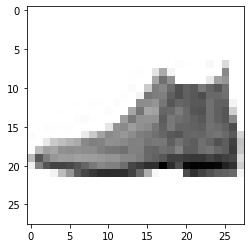

In [12]:
initial = time.time()

query_image = testX[0]
plt.imshow(query_image, cmap=plt.cm.binary)
query_desc = query_image.flatten()

images = sc.parallelize(testX,6)
R = images.map(get_img_distance).collect()
R = list(filter(lambda x:x['distance'] > 0.6,R))

print("Execution Time : ",time.time() - initial)

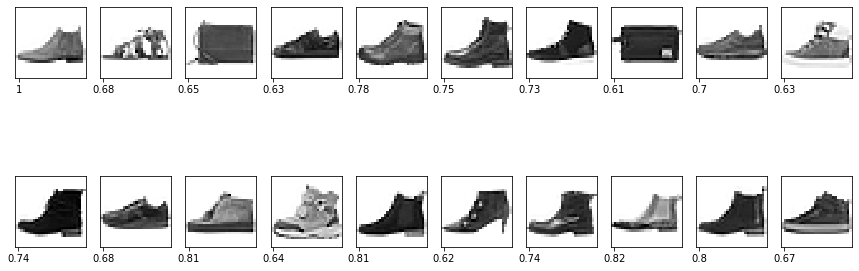

In [85]:
Show_Results(R,20)

In [67]:
sc

<SparkContext master=local[*] appName=Optimization>

In [70]:
sc.stop()